In [71]:
import tensorflow as tf

In [72]:
TRAIN_DIR = "./dataset/train"
VAL_DIR = "./dataset/validation"
TEST_DIR = "./dataset/test"

IMG_SIZE = (64, 64)

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)


BATCH_SIZE = 256
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary',
                                                    target_size = IMG_SIZE)

validation_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                       batch_size = BATCH_SIZE,
                                                       class_mode = 'binary',
                                                       target_size = IMG_SIZE)


test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'binary',
                                                  target_size = IMG_SIZE)

Found 19999 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_28 (Bat  (None, 62, 62, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 60, 60, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                      

In [75]:
optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

## Training Model With Data Augmentation

In [76]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-8)
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    batch_size=BATCH_SIZE,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[lr_callback, early_stop_callback])

Epoch 1/100


2024-02-27 03:54:13.619365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-27 03:54:13.907598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - ETA: 0s - loss: 0.8262 - accuracy: 0.5764

2024-02-27 03:54:59.971009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-27 03:55:00.035998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 54s 609ms/step - loss: 0.8262 - accuracy: 0.5764 - val_loss: 0.7394 - val_accuracy: 0.5001 - lr: 0.1000
Epoch 2/100
79/79 [==============================] - 42s 535ms/step - loss: 0.6547 - accuracy: 0.6307 - val_loss: 0.7984 - val_accuracy: 0.5001 - lr: 0.1000
Epoch 3/100
79/79 [==============================] - 42s 535ms/step - loss: 0.6416 - accuracy: 0.6456 - val_loss: 1.0172 - val_accuracy: 0.5001 - lr: 0.1000
Epoch 4/100
79/79 [==============================] - 42s 535ms/step - loss: 0.6239 - accuracy: 0.6604 - val_loss: 0.9270 - val_accuracy: 0.5274 - lr: 0.1000
Epoch 5/100
79/79 [==============================] - 42s 530ms/step - loss: 0.6122 - accuracy: 0.6706 - val_loss: 0.5932 - val_accuracy: 0.6857 - lr: 0.1000
Epoch 6/100
79/79 [==============================] - 42s 528ms/step - loss: 0.6006 - accuracy: 0.6816 - val_loss: 0.5902 - val_accuracy: 0.6859 - lr: 0.1000
Epoch 7/100
79/79 [==============================] - 42s 529ms/step - 

In [77]:
import matplotlib.pyplot as plt
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

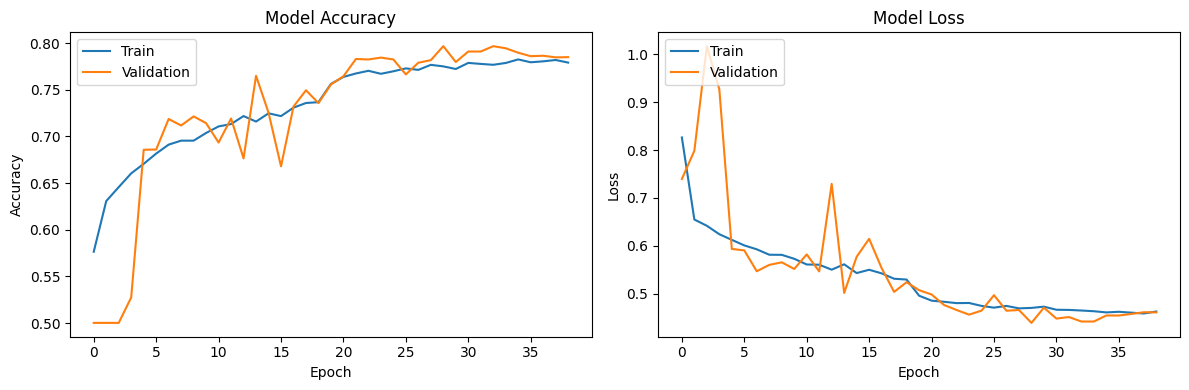

In [78]:
plot_history(history=history)

In [79]:
loss, acc = model.evaluate_generator(test_generator)

/var/folders/rh/j46lc71j5qv4m38j7qglyclr0000gn/T/ipykernel_90945/175666320.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_generator)
2024-02-27 04:21:52.221529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [80]:
print(f'Test loss {loss}, and Test accuracy {acc}')

Test loss 0.44905924797058105, and Test accuracy 0.796999990940094
